In [10]:
from auto_classify import ImgFace
import pickle
import cv2


In [11]:

import matplotlib.pyplot as plt

def show_all_image_with_same_class(key: int):
    data: dict[str, list[ImgFace]] = pickle.load(open("example-out/encoding-dict.pkl", "rb"))
    current_class = data[str(key)]
    
    for face_data in current_class:
        img = plt.imread(face_data.img_path)
        top, right, bottom, left = face_data.face_location

        cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(img, f"class_{key}", (left, top - 6), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 2)

        plt.imshow(img)
        plt.axis("off")
        plt.show()

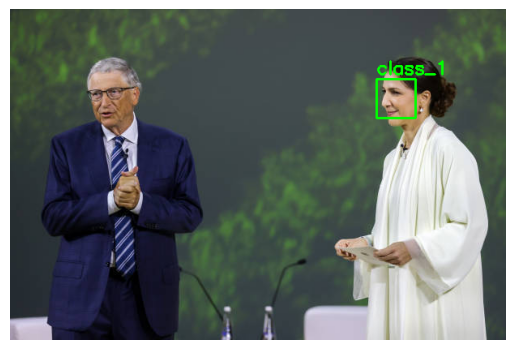

In [12]:
show_all_image_with_same_class(1)

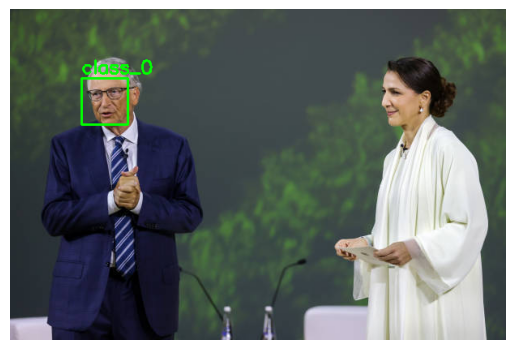

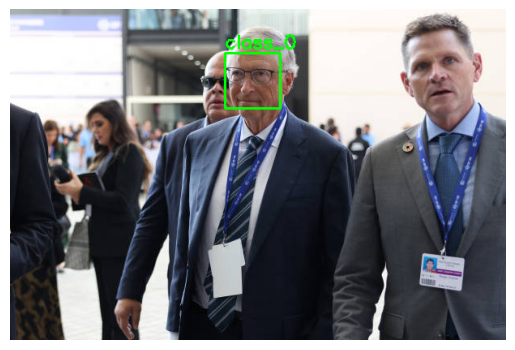

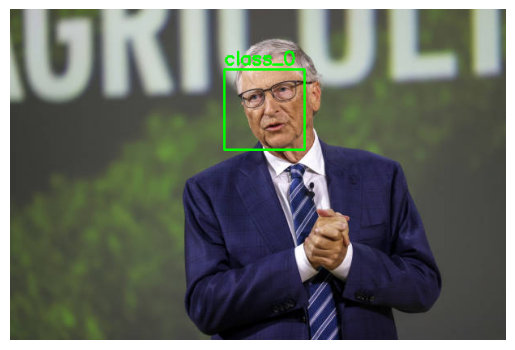

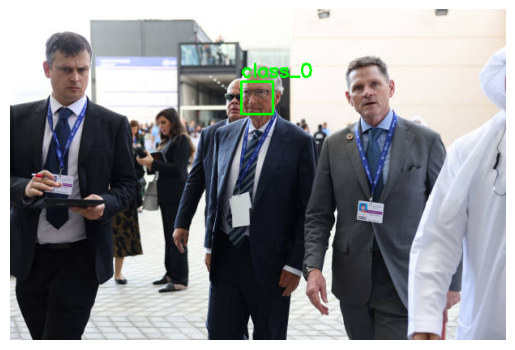

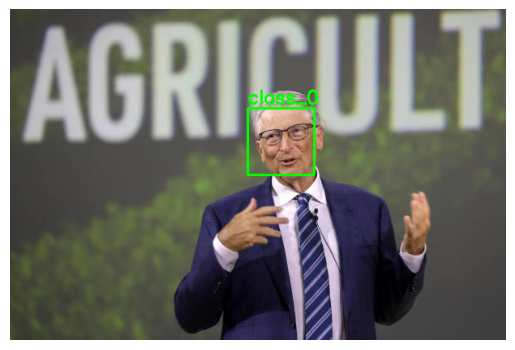

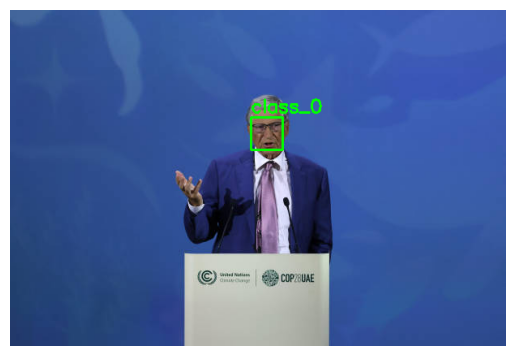

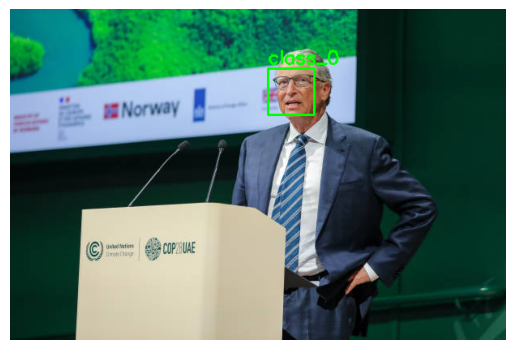

In [13]:
show_all_image_with_same_class(0)